In [25]:
install.packages('ecodist')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [28]:
Output = '/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1015. Fire Sufficient Similarity/P1015.3. Analyses/P1015.3.3. Cluster Analysis/Output'
cur_date = '012426'

library(readxl)
library(tidyverse)
library(reshape2)
library(vegan)
library(ecodist)
# library(factoextra)
# library(FactoMineR)
# library(gridExtra)
# library(ggrepel)
# library(RColorBrewer)
# library(gridtext)

# reading in files
full_df = data.frame(read_excel("Input/Processed_Data_012426.xlsx")) 


Attaching package: ‘ecodist’


The following objects are masked from ‘package:vegan’:

    mantel, pco




In [29]:
head(full_df)

,Sample,HAWC_ID,Study,Sample_Number,Class,Metric,Study_Sample_ID,DTXSID,Name,Value
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,WF,1289889,Scaramboni et al. 2024,3,Metal,Volume,1289889_3,Cu,Copper,6.7813597
2,WF,1289889,Scaramboni et al. 2024,3,Metal,Volume,1289889_3,Pb,Lead,0.8718436
3,WF,1289889,Scaramboni et al. 2024,3,Metal,Volume,1289889_3,Zn,Zinc,NA
4,WF,1289889,Scaramboni et al. 2024,3,Metal,Volume,1289889_3,Ca,Calcium,8.5961898
5,WF,1289889,Scaramboni et al. 2024,3,Metal,Volume,1289889_3,Ni,Nickel,0.5464964
6,WF,1289889,Scaramboni et al. 2024,3,PAH,Volume,1289889_3,DTXSID2020139,Benzo(a)pyrene,0.1256511


# PCoA

INSERT WORDS

In [30]:
# splitting based on metric
metric_split = full_df %>%
    group_by(Metric) %>%
    group_split()

vol_df = metric_split[[1]]
weight_df = metric_split[[2]]

In [43]:
# wide matrix: samples x constituents
wide_vol_df = vol_df %>%
    group_by(Study_Sample_ID, DTXSID) %>%
    summarize(Value = mean(Value, na.rm = TRUE), .groups = "drop") %>%
    pivot_wider(names_from = DTXSID, values_from = Value) %>%
    column_to_rownames('Study_Sample_ID')
wide_weight_df = weight_df %>%
    group_by(Study_Sample_ID, DTXSID) %>%
    summarize(Value = mean(Value, na.rm = TRUE), .groups = "drop") %>%
    pivot_wider(names_from = DTXSID, values_from = Value) %>%
    column_to_rownames('Study_Sample_ID')

 # Missing-by-design: treat as 0 for Bray–Curtis (no imputation beyond "not observed")
wide_vol_df[is.na(wide_vol_df)] <- 0
wide_weight_df[is.na(wide_weight_df)] <- 0

head(wide_vol_df)

,Ca,Cu,DTXSID0022432,DTXSID2020139,DTXSID3024104,DTXSID3024289,DTXSID5023908,DTXSID6024254,Fe,K,Mn,Ni,Pb,Sr,Zn
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1070627_1,10.421118,7.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.124121,9.915282,5.906891,6.601399,6.285402,0.00000,7.452035
1070627_2,9.219653,4.412782,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.741467,9.252429,3.711495,3.217231,2.536053,0.00000,5.364572
1263480_1,18.892083,13.550867,14.07439,16.70051,19.15870,19.39310,16.06384,20.99731,15.383671,21.618070,13.550867,0.000000,12.425478,12.77335,18.116806
1263480_2,18.694559,13.340963,20.38390,18.41184,20.86193,20.99938,18.37836,22.78409,14.587895,20.074637,13.074476,10.426265,0.000000,12.72089,20.306748
1263480_3,17.693712,0.000000,19.73397,17.15562,19.92940,19.96579,17.31009,22.01886,13.287857,18.800258,13.823865,0.000000,13.287857,12.55099,17.227889
1263484_1,0.000000,0.000000,16.74716,15.87270,18.84230,18.71398,14.87272,20.61863,15.985286,21.407453,12.765079,12.036517,14.733492,0.00000,15.168633


In [44]:
# Bray–Curtis distance
bc_vol_df = vegdist(wide_vol_df, method = "bray")
bc_weight_df = vegdist(wide_weight_df, method = "bray")

# PCoA
pcoa_vol = pco(bc_vol_df)
pcoa_weight = pco(bc_weight_df)

# getting first two dimensions and adding back in meta data
pcoa_vol_df = data.frame('Study_Sample_ID' = rownames(wide_vol_df), PC1 = pcoa_vol$vectors[,1], 
                                  PC2 = pcoa_vol$vectors[,2]) %>%
    inner_join(vol_df[,c(1,5,7)])
pcoa_weight_df = data.frame('Study_Sample_ID' = rownames(wide_weight_df), PC1 = pcoa_weight$vectors[,1], 
                                  PC2 = pcoa_weight$vectors[,2]) %>%
    inner_join(weight_df[,c(1,5,7)])

head(pcoa_vol_df)

Joining with `by = join_by(Study_Sample_ID)`
Joining with `by = join_by(Study_Sample_ID)`


,Study_Sample_ID,PC1,PC2,Sample,Class
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,1070627_1,-0.4962629,0.05642864,WF,Metal
2,1070627_1,-0.4962629,0.05642864,WF,Metal
3,1070627_1,-0.4962629,0.05642864,WF,Metal
4,1070627_1,-0.4962629,0.05642864,WF,Metal
5,1070627_1,-0.4962629,0.05642864,WF,Metal
6,1070627_1,-0.4962629,0.05642864,WF,PAH


In [48]:
# getting variance????



[1] 3.858693e+00 1.680210e+00 1.464482e+00 5.463014e-01 4.343363e-01
 [6] 2.775941e-01 2.386433e-01 1.977794e-01 1.272259e-01 9.209313e-02
[11] 6.966771e-02 2.340725e-02 2.037132e-02 1.215140e-02 6.005174e-03
[16] 3.807453e-03 3.592726e-03 2.271915e-03 2.801277e-17 0.000000e+00
[21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
[26] 0.000000e+00 0.000000e+00

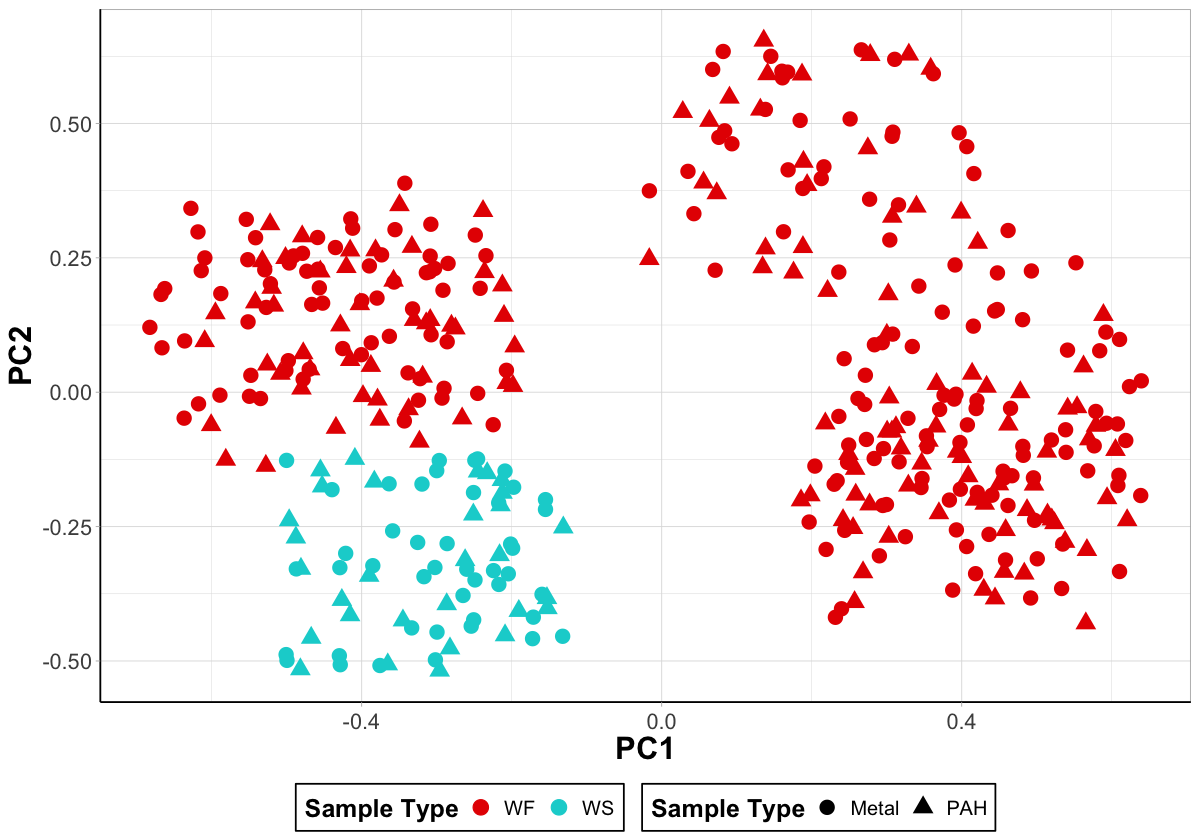

In [42]:
options(repr.plot.width=10, repr.plot.height=7) #changing size
vol_pca_figure = ggplot() + 
  geom_point(data = pcoa_vol_df, aes(x = PC1, y = PC2, color = Sample, shape = Class),
             size = 4, position = position_jitter(w = 0.2, h = 0.2), alpha = 1) + 
  # stat_ellipse(data = pcoa_vol_df, aes(x = PC1, y = PC2, color = Sample)) + 
  # geom_text_repel(data = full_eigenvector_df %>%
  #          filter(Metric == 'Volume', PC1 > 5), 
  #                 aes(x = PC1, y = PC2, color = Sample, label = SampleID), 
  #                 segment.size = 0, size = 5, show.legend = FALSE, nudge_y = 0.3) + 

  theme_light() + 
  theme(axis.text.x = element_text(vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 13), #changing size of x axis labels
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", 
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text.x = element_text(size = 18, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 18, face = "bold")) + #changes size of facet y axis 

  labs(#x = 'Dimension 1 (78.9%)', y = 'Dimension 2 (13.4%)', #changing axis labels 
       color = "Sample Type", shape = "Sample Type") + #changing legend title

  scale_color_manual(values = c('#e60000', '#00d2d2'))

vol_pca_figure

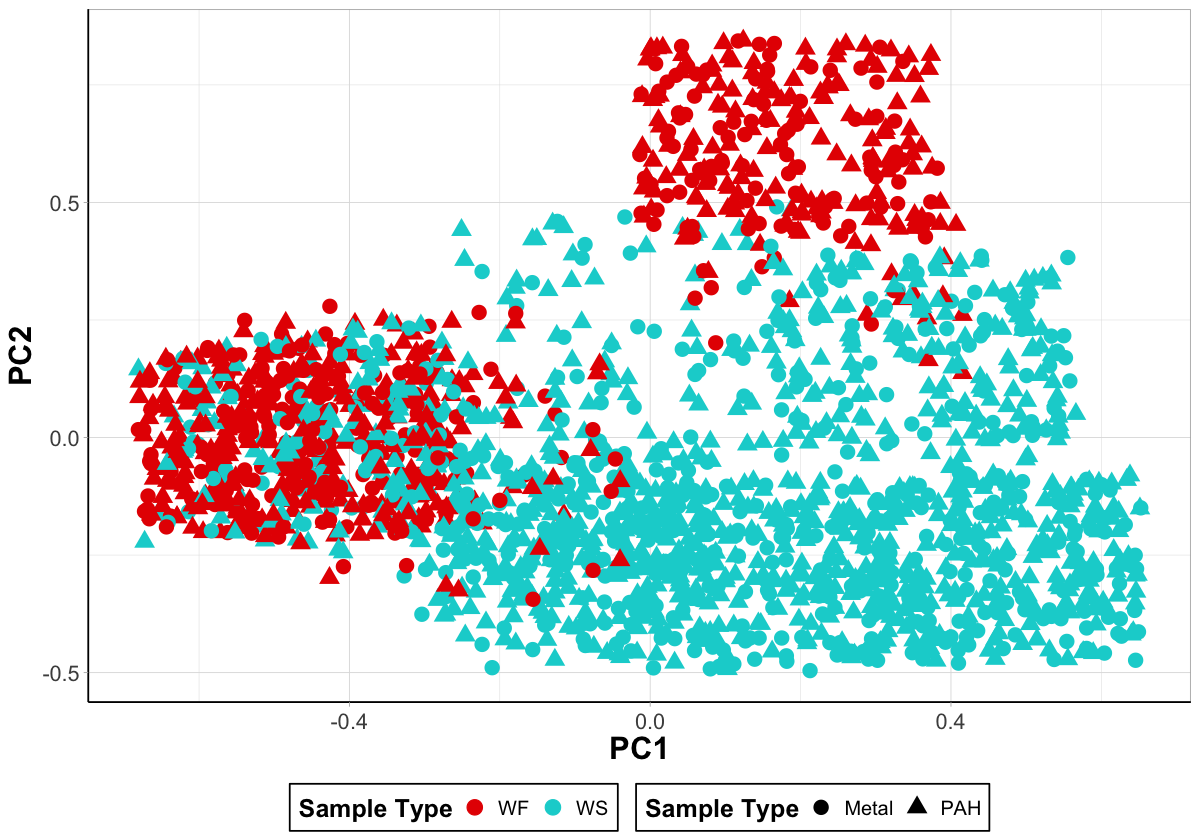

In [47]:
weight_pca_figure = ggplot() + 
  geom_point(data = pcoa_weight_df, aes(x = PC1, y = PC2, color = Sample, shape = Class),
             size = 4, position = position_jitter(w = 0.2, h = 0.2), alpha = 1) + 
  # stat_ellipse(data = pcoa_vol_df, aes(x = PC1, y = PC2, color = Sample)) + 
  # geom_text_repel(data = full_eigenvector_df %>%
  #          filter(Metric == 'Volume', PC1 > 5), 
  #                 aes(x = PC1, y = PC2, color = Sample, label = SampleID), 
  #                 segment.size = 0, size = 5, show.legend = FALSE, nudge_y = 0.3) + 

  theme_light() + 
  theme(axis.text.x = element_text(vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 13), #changing size of x axis labels
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", 
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text.x = element_text(size = 18, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 18, face = "bold")) + #changes size of facet y axis 

  labs(#x = 'Dimension 1 (78.9%)', y = 'Dimension 2 (13.4%)', #changing axis labels 
       color = "Sample Type", shape = "Sample Type") + #changing legend title

  scale_color_manual(values = c('#e60000', '#00d2d2'))

weight_pca_figure